In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## **Data Understanding & Cleansing**

In [185]:
df = pd.read_csv('Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [186]:
df = df.drop(df.columns[0:2], axis=1)

In [187]:
df.head()

,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_created  20000 non-null  object
 1   post_text     20000 non-null  object
 2   user_id       20000 non-null  int64 
 3   followers     20000 non-null  int64 
 4   friends       20000 non-null  int64 
 5   favourites    20000 non-null  int64 
 6   statuses      20000 non-null  int64 
 7   retweets      20000 non-null  int64 
 8   label         20000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [189]:
df.isna().sum()

post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [190]:
df_depressed = df.copy()
df_depressed['label']=np.where(df['label']==1,'Depressed', 'Not Depressed')
df_depressed[['label']]

,label
0,Depressed
1,Depressed
2,Depressed
3,Depressed
4,Depressed
...,...
19995,Not Depressed
19996,Not Depressed
19997,Not Depressed
19998,Not Depressed


## **EDA**

In [191]:
numerical_features = df_depressed.drop(columns='user_id').describe().columns

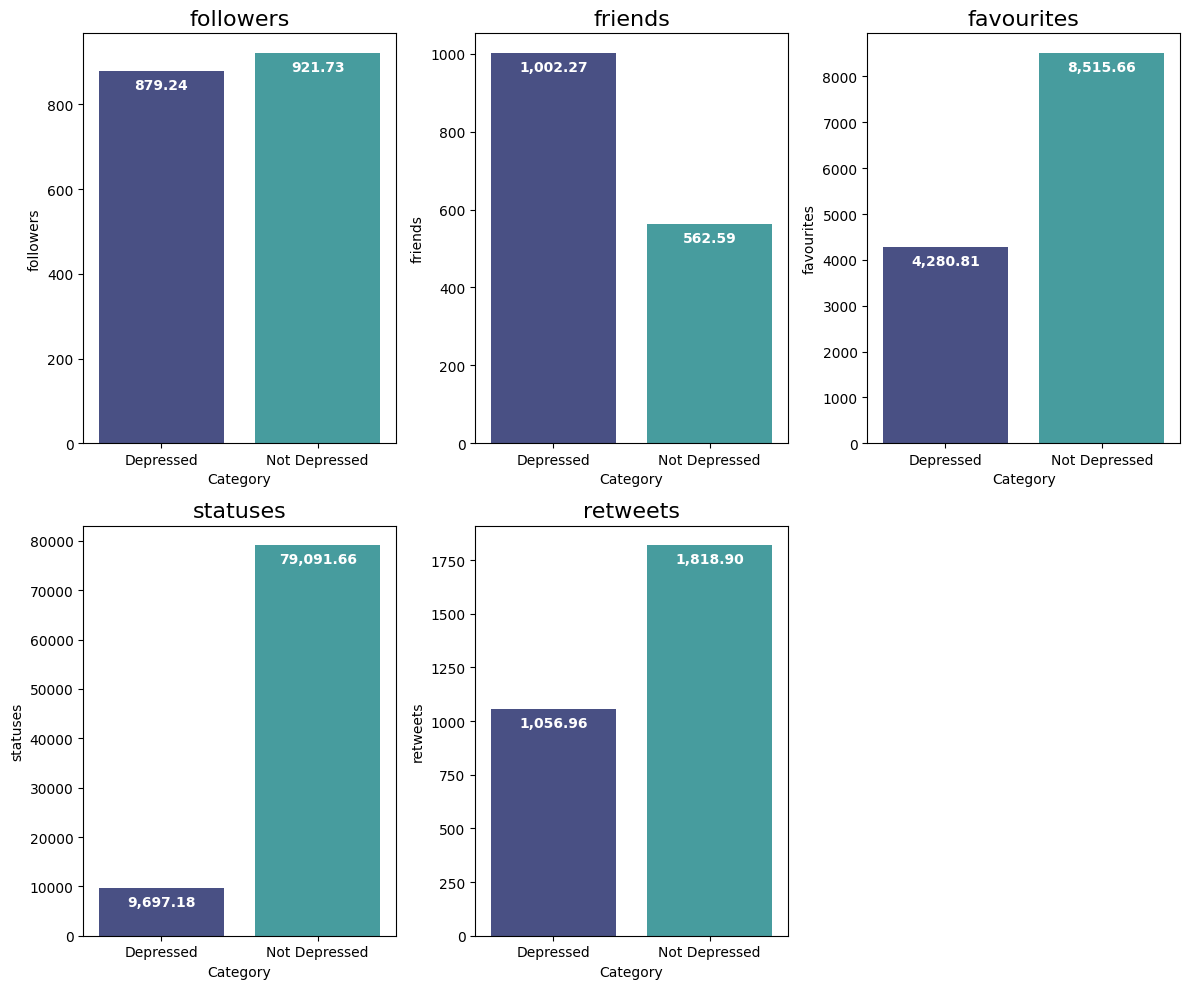

In [192]:
plt.figure(figsize=(12, 10))


# Mengatur posisi subplot
plotnumber = 1

for feature in numerical_features:
    plt.subplot(2, 3, plotnumber)
    sns.barplot(y=feature, x='label', data=df_depressed, palette='mako', errorbar=None)
    
    # Menambahkan label pada bar
    for container in plt.gca().containers:
        plt.gca().bar_label(container, labels=[f'{x:,.2f}' for x in container.datavalues], label_type='edge', padding=-15, color="white", fontweight='bold')
    
    plt.title(feature, fontsize=16)
    plt.xlabel('Category')
    plt.ylabel(feature)
    plt.tight_layout()
    plotnumber += 1

## **Preprocessing 1**

#### **Lowercase**


In [193]:
def to_lower(text):
    return text.lower()

#### **Expand Contraction**

In [194]:
import regex as re

In [195]:
contractions_dict = {    
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}
 
 
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)
                                    # re.IGNORECASE: case insensitive
                                    # re.DOTALL: titik dianggap titik, bukan sebagai wildcard
 
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction
 
    expanded_text = contractions_pattern.sub(expand_match, text) # dari singkatan, menjadi dijabarkan
    expanded_text = re.sub("'", "", expanded_text) # menghilangkan petik satu
    return expanded_text
 
def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

**Remove RT dan Tag**

In [196]:
def remove_link_tag(teks):
    # Menghapus RT
    pattern_rt = r'RT\s+'
    teks = re.sub(pattern_rt, '', teks)
    
    # Menghapus tautan
    pattern_link = r'https?://\S+'
    teks = re.sub(pattern_link, '', teks)
    
    # Menghapus tag
    pattern_tag = r'@\w+'
    teks = re.sub(pattern_tag, '', teks)
    
    return teks

#### **Remove (Replace) Number**

In [197]:
def remove_number(text):
    return "".join([char for char in text if not char.isdigit()])

#### **Remove Punctuation**

In [198]:
from string import punctuation

In [199]:
def remove_punctuation(text):
    return "".join([char for char in text if char not in punctuation])

#### **Remove Stopwords**

In [200]:
import nltk
from nltk.corpus import stopwords

In [201]:
english_stop_words = stopwords.words('english')

In [202]:
def remove_stop_words(text):
    return " ".join([word for word in nltk.wordpunct_tokenize(text) if word not in english_stop_words])

### **Remove Whitespaces**

In [203]:
def remove_whitespaces(text):
    return " ".join(text.split())

### **Combine All Steps**

In [204]:
def text_preprocessing(text):

    text = remove_link_tag(text)
    text = to_lower(text)
    text = main_contraction(text)
    text = remove_number(text)
    text = remove_punctuation(text)
    text = remove_stop_words(text)
    text = remove_whitespaces(text)

    return text

## **Preprocessing 2**

In [205]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer

In [206]:
df['prep'] = df['post_text'].apply(text_preprocessing)
df.head()

,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,prep
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,years since diagnosed anxiety depression today...
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,sunday need break planning spend little time p...
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,awake tired need sleep brain ideas
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,retro bears make perfect gifts great beginners...
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,’ hard say whether packing lists making life e...


In [207]:
df = df[['prep', 'label']]

#### **Lemmatization**

In [208]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [209]:
lemma = WordNetLemmatizer()

In [210]:
def get_lemma(texts):
    return " ".join([lemma.lemmatize(text) for text in texts.split()])

## **Combined Preprocessing 1 dan Prepprocessing 2**

In [211]:
df['lemmatizing'] = df['prep'].apply(get_lemma)
df.head()

,prep,label,lemmatizing
0,years since diagnosed anxiety depression today...,1,year since diagnosed anxiety depression today ...
1,sunday need break planning spend little time p...,1,sunday need break planning spend little time p...
2,awake tired need sleep brain ideas,1,awake tired need sleep brain idea
3,retro bears make perfect gifts great beginners...,1,retro bear make perfect gift great beginner ge...
4,’ hard say whether packing lists making life e...,1,’ hard say whether packing list making life ea...


### **Words Frequency**

In [212]:
def count_word(text):

    df_text = text.str.extractall('([a-zA-Z]+)')        # mengambil tiap kata
    df_text.columns = ['freq']                          # mengganti nama kolom
    df_text = df_text.reset_index()                     # reset index
    df_unique_word = df_text['freq'].value_counts()     # menghitung frekuensy tiap kata

    df_unique_word = df_unique_word.to_frame().reset_index().rename(columns={'count':'word'})
    
    return df_unique_word

In [213]:
count_word(df['lemmatizing']).head(20)

,freq,word
0,like,996
1,depression,882
2,one,749
3,u,710
4,get,682
5,love,624
6,know,611
7,people,578
8,say,510
9,amp,492


**Most Frequent Words**

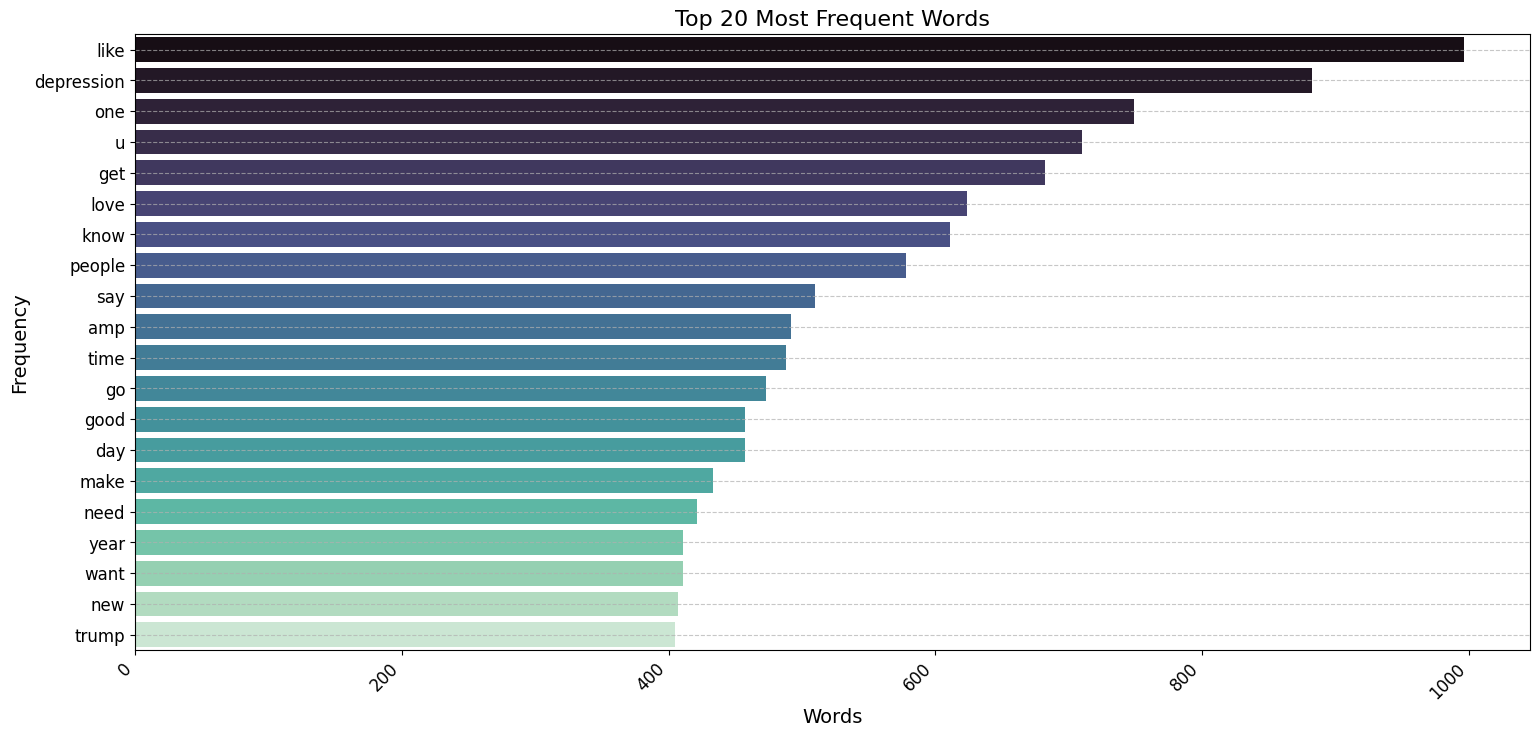

In [214]:
plt.figure(figsize=(18, 8))
sns.barplot(
    data=count_word(df['lemmatizing']).head(20),
    x='word',
    y='freq',
    palette='mako'  # Adjust color palette for better visualization
)

# Adding labels and title with a larger font size
plt.title('Top 20 Most Frequent Words', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjusting y-axis label font size
plt.yticks(fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Most Frequent Words in Depressed Tweet**

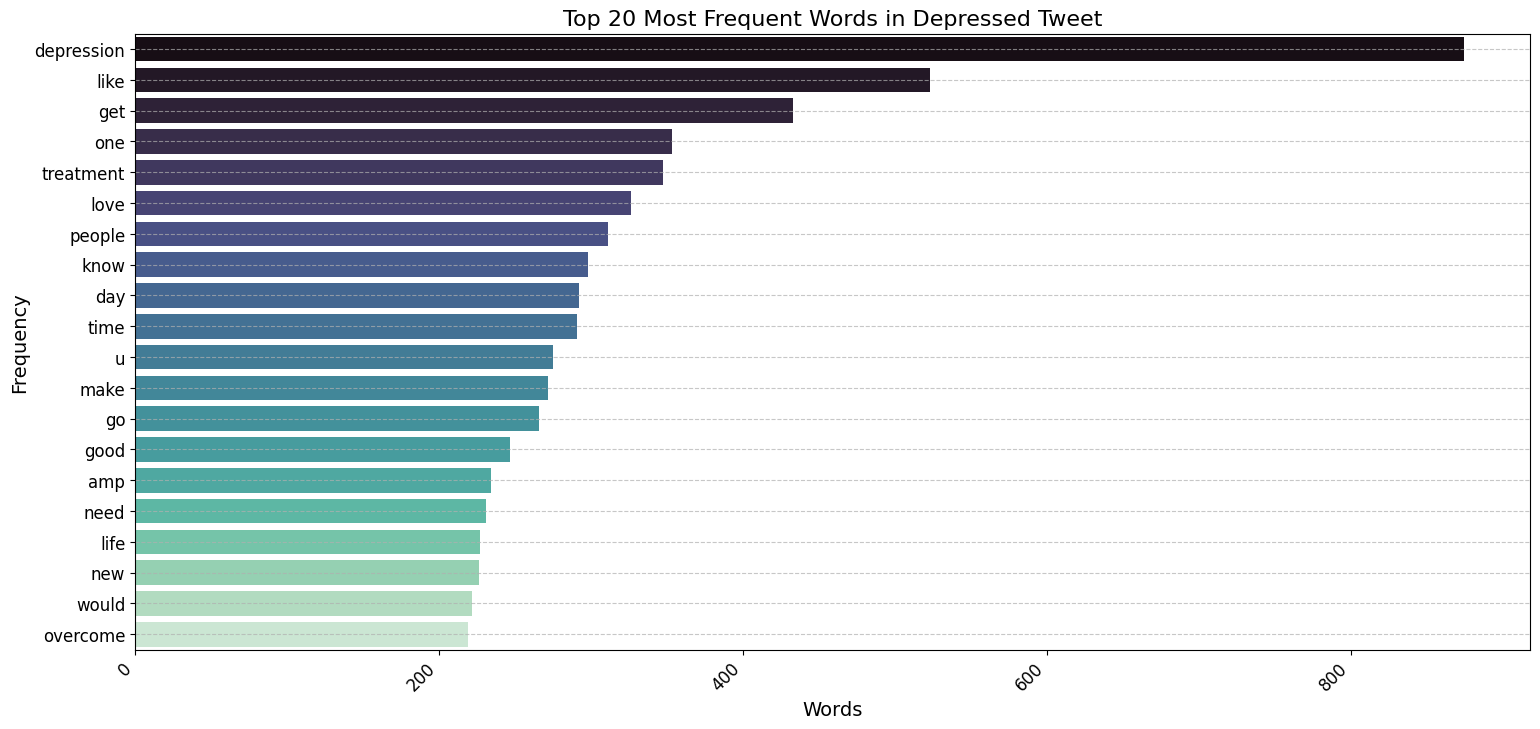

In [215]:
plt.figure(figsize=(18, 8))
sns.barplot(
    data = count_word(df[df['label']==1]['lemmatizing']).head(20),
    x = 'word',
    y = 'freq',
    palette='mako'
)

# Adding labels and title with a larger font size
plt.title('Top 20 Most Frequent Words in Depressed Tweet', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjusting y-axis label font size
plt.yticks(fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Most Frequent Words in Non Depressed Tweet**

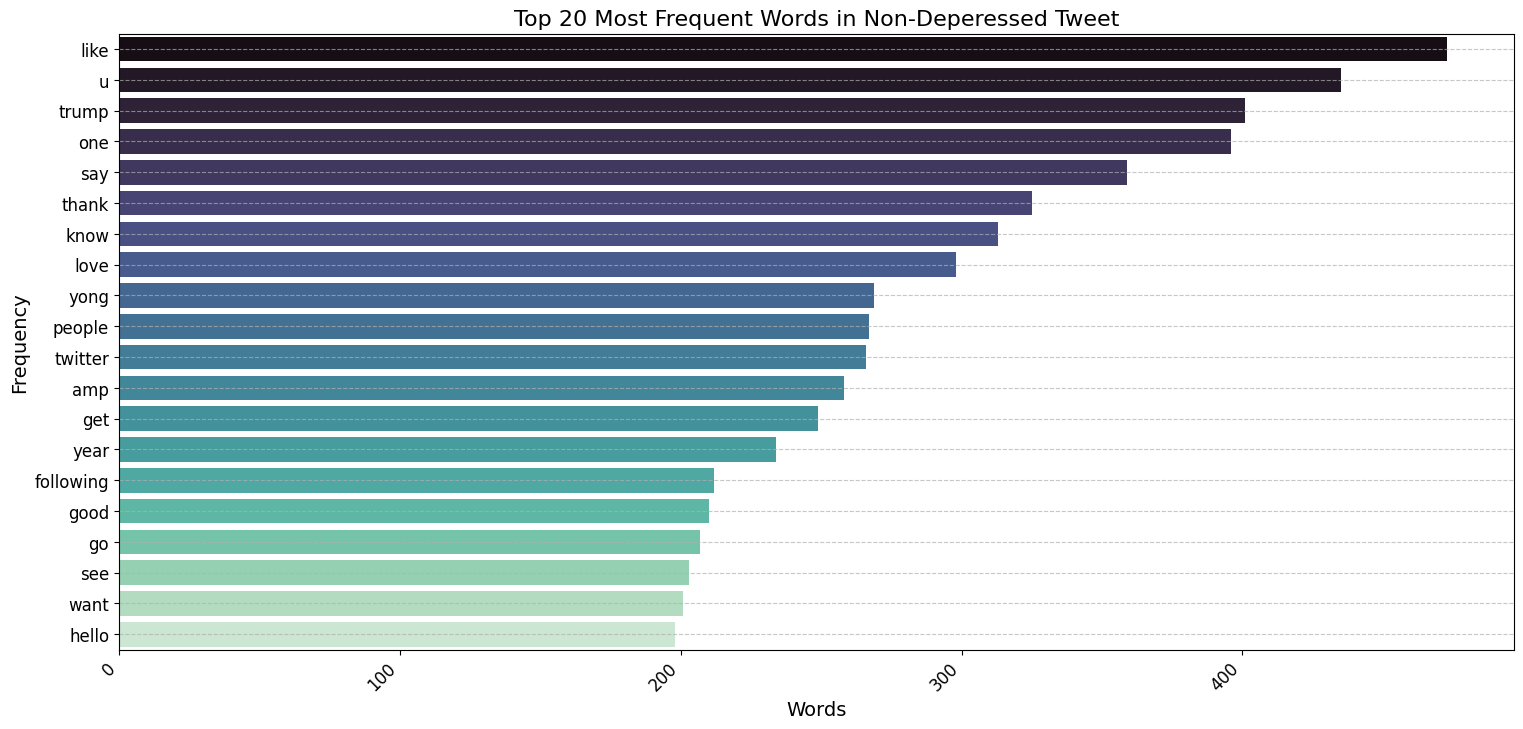

In [216]:
plt.figure(figsize=(18, 8))
sns.barplot(
    data = count_word(df[df['label']==0]['lemmatizing']).head(20),
    x = 'word',
    y = 'freq',
    palette='mako'
)

# Adding labels and title with a larger font size
plt.title('Top 20 Most Frequent Words in Non-Deperessed Tweet', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjusting y-axis label font size
plt.yticks(fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### **2. Length of Documents**

In [217]:
df['length'] = df['lemmatizing'].apply(len)
df.head()

,prep,label,lemmatizing,length
0,years since diagnosed anxiety depression today...,1,year since diagnosed anxiety depression today ...,82
1,sunday need break planning spend little time p...,1,sunday need break planning spend little time p...,53
2,awake tired need sleep brain ideas,1,awake tired need sleep brain idea,33
3,retro bears make perfect gifts great beginners...,1,retro bear make perfect gift great beginner ge...,78
4,’ hard say whether packing lists making life e...,1,’ hard say whether packing list making life ea...,98


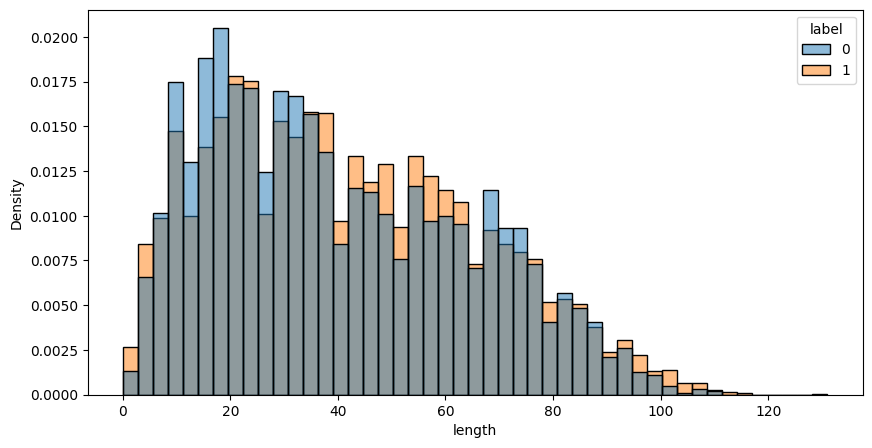

In [218]:
plt.figure(figsize=(10,5))
sns.histplot(data=df[df['length']<4000], x='length', hue='label', common_norm=False, stat='density')
plt.show()

In [219]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [220]:
text = " ".join(list(df['lemmatizing']))
text

'year since diagnosed anxiety depression today taking moment reflect far come since sunday need break planning spend little time possible awake tired need sleep brain idea retro bear make perfect gift great beginner get stitching october sew sale yay ’ hard say whether packing list making life easier reinforcing much still need movinghouse anxiety making packing list new hobby movinghouse point keeping stuff nostalgic reason cross line plain old hoarding movinghouse currently findingboxesofrandomshit packing phase think ’ closet hoarder cannot bothered cook take away way 😁👍🏼 lazy itv release promo video final series downton abbey also much stuff way way much movinghouse never want put one together lotharderthanitlooks moving stuff bloomin ’ knackering ’ still load 😥 back house moving stuff ’ peaceful ❤️ 🏡 😊 urgh anxiety ffs come breathe much stuff way way much massive purge way hideous traffic must remember pay closer attention traffic report packing purging feel good 😊👍🏼 bampq looking

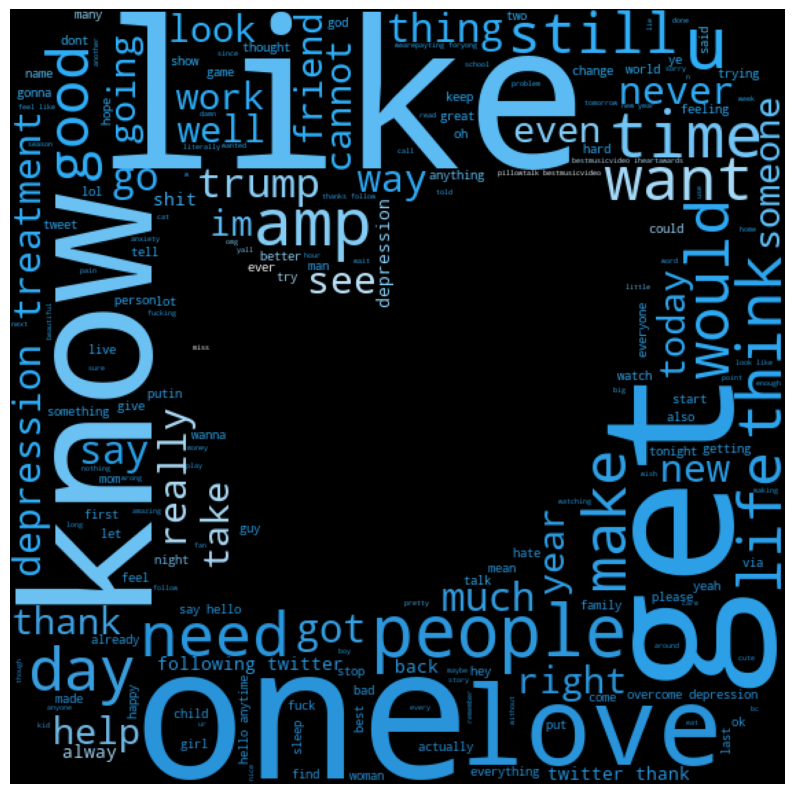

In [221]:
# combining the image with dataset
Mask = np.array(Image.open('twitter-logo.jpg'))

# Generate word cloud image
wordcloud = WordCloud(stopwords=english_stop_words, background_color='black', height=1500, width=1500, mask=Mask).generate(text)

image_colors = ImageColorGenerator(Mask)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='hamming')

plt.axis('off')
plt.show()

## **Text Classification**

In [222]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, fbeta_score, make_scorer, recall_score, precision_score, classification_report, accuracy_score

### **Define Text and Target**

In [223]:
text = df['lemmatizing']
y = df['label']

In [224]:
y.value_counts()/len(y)

label
1    0.5
0    0.5
Name: count, dtype: float64

### **Data splitting**

In [225]:
# train test split
text_train, text_test, y_train, y_test = train_test_split(text, y, stratify=y, test_size=0.2, random_state=0)

In [226]:
# Define models
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
gradboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)

models_name = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']

In [227]:
# Create scorer
f1_score = make_scorer(fbeta_score, beta=1)

In [228]:
# Define resampler
smote = SMOTE(random_state=0)

# Scaler 
minmax = MinMaxScaler()

In [229]:
# Define vectorizer
tfidf_vect = TfidfVectorizer(norm=None)

In [230]:
# Pilihan model
models = [logreg, knn, tree, rf, gradboost, xgboost]

list_mean = []
list_std = []
list_all_score = []

# Mencari model terbaik berdasarkan f0.5 score terbesar dan std terkecil
for algoritma in models :

    pipe_model = Pipeline([
        ('vectorizer', tfidf_vect),
        ('model', algoritma)
    ])

    # cross validation
    skfold = StratifiedKFold(n_splits = 5)
    
    model_cv = cross_val_score(
        estimator=pipe_model,
        X = text_train,    
        y = y_train,
        cv = skfold,
        scoring = f1_score,
        error_score='raise'
    )

    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    list_all_score.append(model_cv.round(4))

In [231]:
pd.DataFrame({
    'model': models_name,
    'mean': list_mean,
    'std': list_std,
    'score': list_all_score
}).sort_values('mean', ascending=False)

,model,mean,std,score
3,Random Forest,0.743117,0.005184,"[0.7375, 0.7396, 0.7489, 0.7396, 0.7499]"
0,Logistic Regression,0.734171,0.008705,"[0.7262, 0.732, 0.7511, 0.7302, 0.7313]"
2,Decision Tree,0.709579,0.003834,"[0.7123, 0.7035, 0.7123, 0.7066, 0.7132]"
1,KNN,0.668209,0.004589,"[0.6638, 0.6748, 0.6677, 0.6719, 0.6629]"
5,XGBoost,0.655065,0.006673,"[0.6512, 0.6554, 0.6484, 0.6528, 0.6676]"
4,Gradient Boosting,0.495064,0.015852,"[0.5153, 0.4743, 0.4874, 0.4865, 0.5118]"


- Berdasarkan cross validation, model terbaik adalah Random Forest dan XGBoost (f1-score 0.**825020**) 
- Mari kita coba cek performa kedua model pada test set

### **Predict Benchmark Model to Test Set**

In [232]:
list_f1_score = []

# Mencari model terbaik berdasarkan f0.5 score terbesar dan std terkecil
for algoritma in [logreg, rf] :

    pipe_model=Pipeline([
        ('vectorizer', tfidf_vect),
        ('model', algoritma)
    ])

    # fitting
    pipe_model.fit(text_train, y_train)

    # predict
    y_pred = pipe_model.predict(text_test)

    # evaluate
    score = fbeta_score(y_test, y_pred, beta=1)
    list_f1_score.append(score)

In [233]:
# Perbandingan performa antar model
pd.DataFrame({
    'model': ['Logistic Regression', 'Random Forest'],
    'f1_score (test_set)': list_f1_score,
})

,model,f1_score (test_set)
0,Logistic Regression,0.746654
1,Random Forest,0.738122


Berdasarkan hasil prediksi pada test set, terlihat bahwa XGBoost memiliki performa akhir yang lebih baik pada dataset ini.

Namun kita akan coba tuning untuk kedua model.

### **Hyperparameter Tuning**

**Logistic Regression**

In [247]:
hyperparam_space = {
    'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__penalty': ['l1', 'l2'],
    'model__max_iter': [50, 100, 200, 300, 400, 500, 1000, 2500],
    'model__fit_intercept': [True, False]}                                                      

# Pipeline
pipe_model = Pipeline([
    ('vectorizer', tfidf_vect),

    ('model', logreg)
])

# Define Randomized Search
skfold = StratifiedKFold(n_splits = 5)

random_search_logreg = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,
    scoring=f1_score,
    n_jobs=-1,
    random_state=0,
    n_iter=100  
)

In [248]:
# fitting 
random_search_logreg.fit(text_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vectorizer',
                                              TfidfVectorizer(norm=None)),
                                             ('model',
                                              LogisticRegression(random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__C': [100, 10, 1, 0.1, 0.01,
                                                     0.001],
                                        'model__fit_intercept': [True, False],
                                        'model__max_iter': [50, 100, 200, 300,
                                                            400, 500, 1000,
                                                            2500],
                                        'model__penalty': ['l1', 'l2'],
                                        'model__solver': ['newton-cg', 'lbfgs',
                                                          'liblinear', 'sag',
                                                          'saga']},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=1))

In [249]:
# score f1 terbaik
random_search_logreg.best_score_

0.7721105013517415

In [250]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_logreg = random_search_logreg.best_estimator_
# fitting
tuned_model_logreg.fit(text_train, y_train)

# predict
y_pred = tuned_model_logreg.predict(text_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=1)

0.7729970326409497

**Summary**

Performa model berdasarkan f1 score pada Test Set

| Model | Before Tuning | After Tuning |
|--|--|--|
|Logistic Regression| 0.7466 | 0.7726 |

Terjadi peningkatan antara hasil prediksi sebelum dan setelah dituning pada Logistic Regression walaupun peningkatan tidak signifikan.

Dengan pertimbangan performa Logistic Regression cukup tinggi dan stabil baik pada train set maupun test set, maka model akhir yang dipakai adalah Logistic Regression.

In [238]:
final_model = random_search_logreg.best_estimator_

## **Model Properties**

**Feature Importances**

In [239]:
final_model['model'].coef_[0]

array([ 0.0380411 , -0.02146681, -0.02351416, ..., -0.01470066,
       -0.01182595, -0.04246985])

In [240]:
len(final_model['model'].coef_[0])

16595

In [241]:
names = final_model[0].get_feature_names_out()
names

array(['aa', 'aaa', 'aaaaaaazfar', ..., '和夫', '松元', '自分が選ぶ今年の枚'],
      dtype=object)

In [242]:
df_importances = pd.DataFrame({
    'features' : names,
    'coefficient' : final_model['model'].coef_[0]
}).sort_values('coefficient', ascending=False)

df_importances

,features,coefficient
3738,depression,0.466612
9025,migraine,0.337504
162,addiction,0.297674
6330,headache,0.296353
1287,bbmas,0.280886
...,...,...
7493,joe,-0.264537
16464,yongkissreturnonpbb,-0.274642
402,aleph,-0.312916
14830,trump,-0.464193


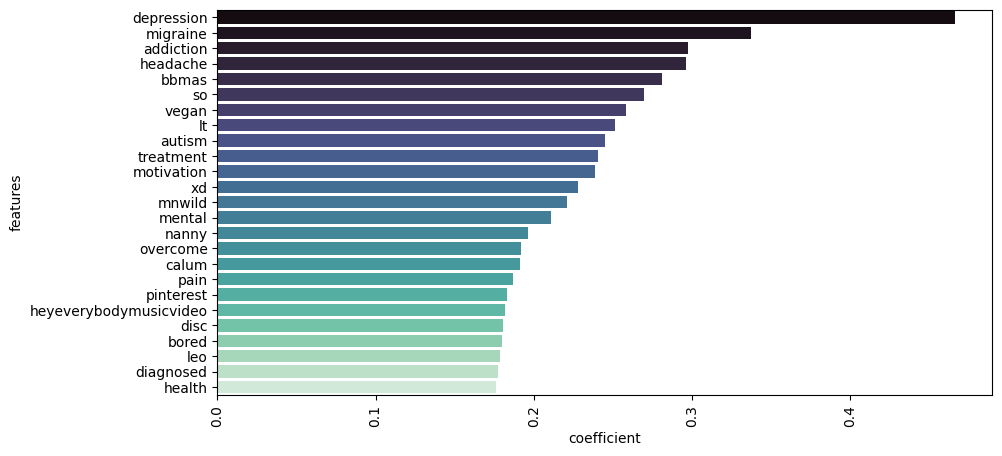

In [243]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_importances.head(25), y='features', x='coefficient', palette='mako')
plt.xticks(rotation=90)
plt.show()

**Confusion Matrix**

In [244]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2000
           1       0.76      0.78      0.77      2000

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000



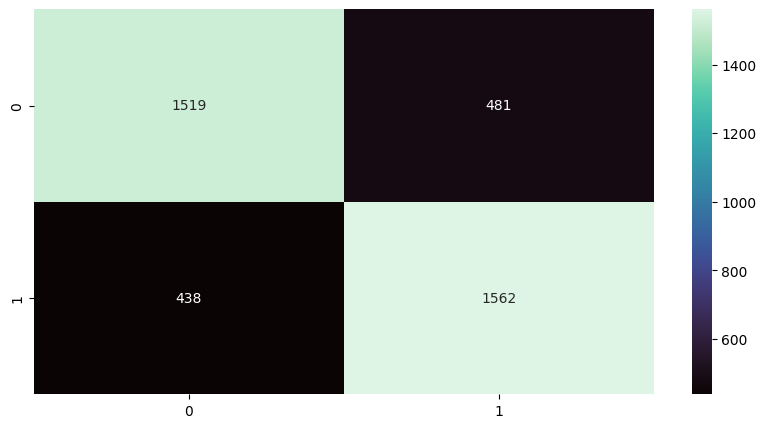

In [246]:
plt.figure(figsize=(10,5))
cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", cmap=cmap)
plt.show()

## **Summary**

- Dalam modeling klasifikasi depressed tweet ini kita menggunakan Logistic Regression.
- Dalam kasus klasifikasi depressed tweet, sebenarnya kita bisa menggunakan metric Precision karena kita fokus untuk melakukan minimalisasi pada False Positive (non depressed tweet yang diprediksi sebagai depressed tweet).
- Hyperparameter tuning berhasil meningkatkan performa model dalam memprediksi apakah suatu tweet termasuk depresed atau bukan, dilihat dari nilai f1 score yang asalnya 0.835 menjadi 0.857 setelah hyperparameter tuning.
